### Fifa is one of my favourite game. Growing up i have played FIFA the most so I wanted to do some data analysis on this dataset.

So what is Fifa 19 ?

- FIFA 19 is a football video game developed by EA Vancouver. 
- It was released on 28 September 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows.




In [751]:
#All required library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set_style("darkgrid")

import re
from math import pi

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Reading dataset 

In [753]:
data= pd.read_csv('data.csv')               
data.head(10)                               # it gives 10 the first 10 rows from the dataset

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [754]:
# Checking all the columns that are available
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [755]:
# Since each row rerpresent a players data,
print('No of Players :',data.shape[0])
print('No of Columns :',data.shape[1])

No of Players : 18207
No of Columns : 89


In [756]:
# To check if there is any NaN values
data.isnull().values.sum()

76984

In [757]:
# To check where there are NaN values more than 1000
df=pd.DataFrame(data.isnull().sum(),columns=[['null']])
df[df.iloc[:,0]>= 1000]

,null
Joined,1553
Loaned From,16943
LS,2085
ST,2085
RS,2085
LW,2085
LF,2085
CF,2085
RF,2085
RW,2085


## Checking and trying to understand why there are NaN values.


In [758]:
c=df[df.iloc[:,0]>= 1000]
col=list(c.index)
col.insert(0, "Name")
data[col]

,Name,Joined,Loaned From,LS,ST,RS,LW,LF,CF,RF,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
0,L. Messi,"Jul 1, 2004",NaN,88+2,88+2,88+2,92+2,93+2,93+2,93+2,...,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,€226.5M
1,Cristiano Ronaldo,"Jul 10, 2018",NaN,91+3,91+3,91+3,89+3,90+3,90+3,90+3,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,€127.1M
2,Neymar Jr,"Aug 3, 2017",NaN,84+3,84+3,84+3,89+3,89+3,89+3,89+3,...,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,€228.1M
3,De Gea,"Jul 1, 2011",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€138.6M
4,K. De Bruyne,"Aug 30, 2015",NaN,82+3,82+3,82+3,87+3,87+3,87+3,87+3,...,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,€196.4M
5,E. Hazard,"Jul 1, 2012",NaN,83+3,83+3,83+3,89+3,88+3,88+3,88+3,...,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,€172.1M
6,L. Modrić,"Aug 1, 2012",NaN,77+3,77+3,77+3,85+3,84+3,84+3,84+3,...,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,€137.4M
7,L. Suárez,"Jul 11, 2014",NaN,87+5,87+5,87+5,86+5,87+5,87+5,87+5,...,68+5,68+5,68+5,69+5,66+5,63+5,63+5,63+5,66+5,€164M
8,Sergio Ramos,"Aug 1, 2005",NaN,73+3,73+3,73+3,70+3,71+3,71+3,71+3,...,84+3,84+3,84+3,81+3,84+3,87+3,87+3,87+3,84+3,€104.6M
9,J. Oblak,"Jul 16, 2014",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€144.5M


### Inference from the above data
> 1) All the NaN values from LS to RB are beacuse of all the players from those rows are GK(GoalKeeper)
>
> 2) The Release Clause NaN values are of Players who do not have any release clause
>
> 3) The Loaned From NaN are players who are not loaned but playing for their respective Clubs
>
> 4) So we ignore these NaN values.

 Since all the NaN values are given with reason we are not going to do any null value imputation

In [759]:
# Showing some statistics about dataset
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [760]:
req_Cols = ["Name","Age","Nationality","Overall","Potential","Club","Value","Wage","Special","International Reputation",
            "Skill Moves","Work Rate","Position","Crossing","Finishing", "HeadingAccuracy", "ShortPassing", 
            "Volleys", "Dribbling","Curve", "FKAccuracy", "LongPassing", "BallControl", "Acceleration",
            "SprintSpeed", "Agility", "Reactions", "Balance", "ShotPower","Jumping", "Stamina", "Strength",
            "LongShots", "Aggression","Interceptions", "Positioning", "Vision", "Penalties", "Composure",
            "Marking", "StandingTackle", "SlidingTackle", "GKDiving", "GKHandling","GKKicking",
            "GKPositioning", "GKReflexes"]



# Create new dataset with the Trimmed set of columns
data_Trimmed = data[req_Cols]
req_Cols_Simple = ["Name","Age","Nationality","Overall","Potential","Club","Value","Position"]
data_Simple = data[req_Cols_Simple]

# We subtract from the potential to overall for get the possible growth of a player
data_Simple["Growth"] = data_Simple["Potential"] - data_Simple["Overall"]

C:\Users\Se7eN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [761]:
# Creating a new column Unit to get the units place value of the players
data_Simple['Unit'] = data_Simple['Value'].str[-1]


# Creating another column where ony the value of the player is shown
data_Simple['Value(M)'] = np.where(data_Simple['Unit'] == '0', 0,data_Simple['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
data_Simple['Value(M)'] = data_Simple['Value(M)'].astype(float)
data_Simple['Value(M)'] = np.where(data_Simple['Unit'] == 'M',data_Simple['Value(M)'],data_Simple['Value(M)']/1000)

# Droping the Unit column
data_Simple = data_Simple.drop('Unit', 1)
data_Simple

C:\Users\Se7eN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Se7eN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Se7eN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,Name,Age,Nationality,Overall,Potential,Club,Value,Position,Growth,Value(M)
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,RF,0,110.50
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,ST,0,77.00
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,LW,1,118.50
3,De Gea,27,Spain,91,93,Manchester United,€72M,GK,2,72.00
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,RCM,1,102.00
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,LF,0,93.00
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,RCM,0,67.00
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,RS,0,80.00
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,RCB,0,51.00
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,GK,3,68.00


In [762]:
# Creating a list of English League clubs
English_Leg_Clubs = [ "Chelsea","Manchester United","Manchester City","Arsenal",
                      "Bournemouth","Burnley","Cardiff City", "Crystal Palace", "Everton",
                      "Fulham",  "Huddersfield Town","Leicester City", "Liverpool",  "Newcastle United",
                      "Southampton", "Tottenham Hotspur", "Watford","West Bromwich Albion", 
                      "West Ham United", "Wolverhampton Wanderers"]
    
# We take all the players in the English League in a dataset
data_Simple_English = data_Simple[data_Simple['Club'].isin(English_Leg_Clubs)]

data_Simple_English.isnull().sum()
data_Simple_English = data_Simple_English.dropna()

In [763]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

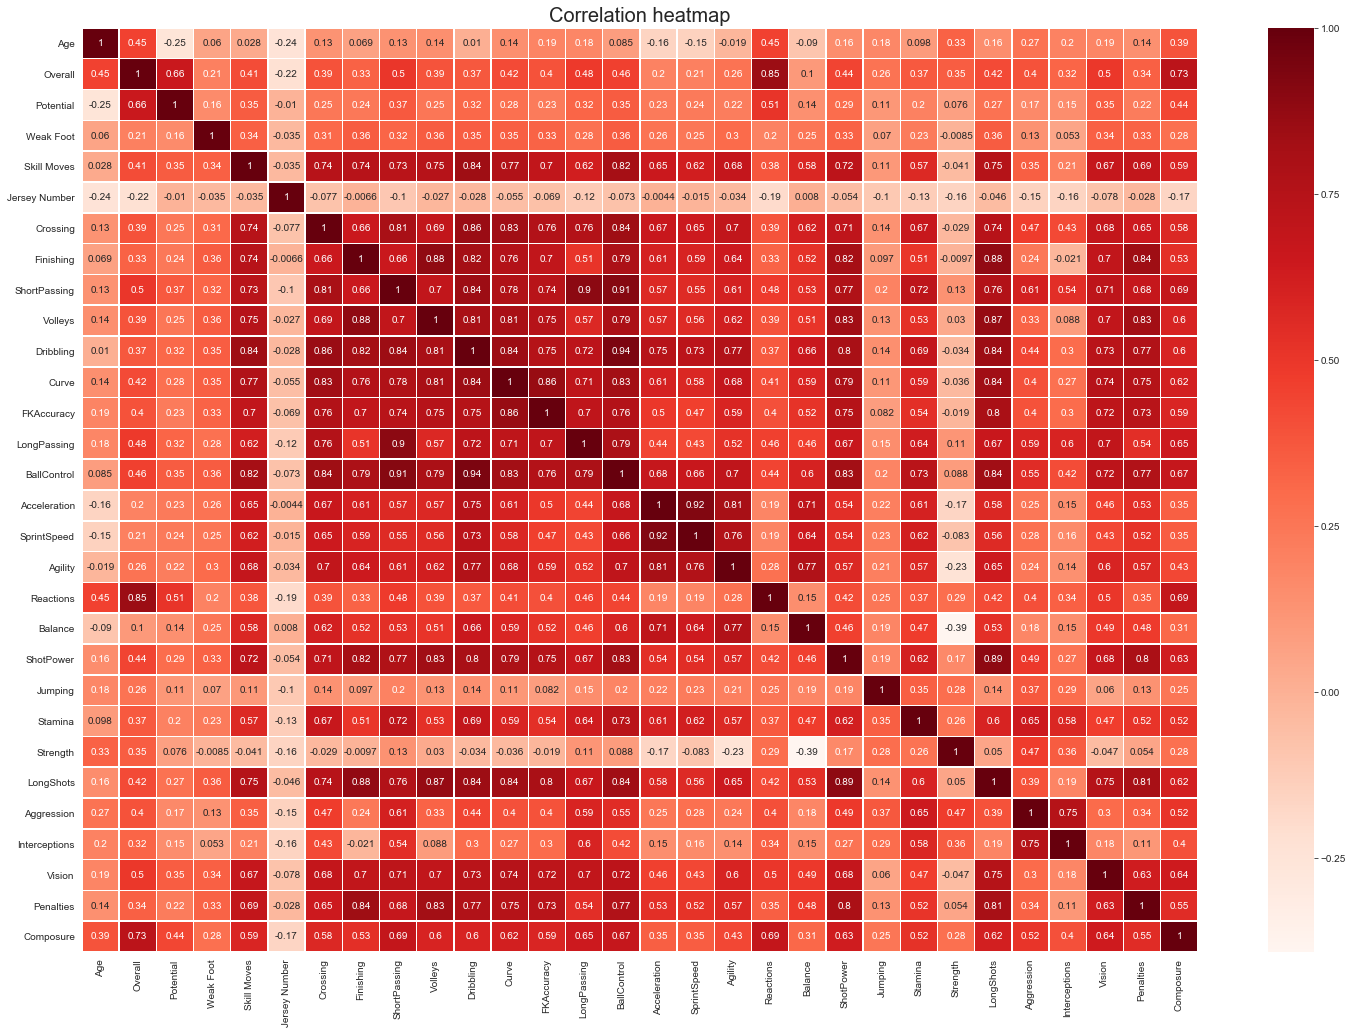

In [764]:
# Correlation heatmap between some of the features.
plt.rcParams['figure.figsize']=(25,17)
heat_m=sns.heatmap(data[['Age','Overall', 'Potential', 'Value', 'Wage', 'Preferred Foot',
                     'Weak Foot', 'Skill Moves', 'Work Rate', 'Position',
                     'Jersey Number', 'Height', 'Weight', 'Crossing','Finishing',
                     'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 
                     'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 
                     'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                     'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 
                     'Vision', 'Penalties', 'Composure']].corr(), annot = True, linewidths=.5, cmap='Reds')
heat_m.set_title(label='Correlation heatmap', fontsize=20)
plt.show()

## Inference,
- We can see that Jersey Number is not corelated to most of the columns
- Strength is -0.39 corelated to Balance 
> Meaning as Strength increase Balance may go down.
##### We can see that some stats like ,


- LongShots and Finishing are 0.88 corelated
- LongShots and ShotPower are 0.89 corelated
- LongPassing and ShortPassing are 0.90 corelated
- BallControl and ShortPassing are 0.91 corelated
- BallControl and Dribbling are 0.94 corelated

## Some features about:
* Age
* Overall
* Potential
* Skill Moves

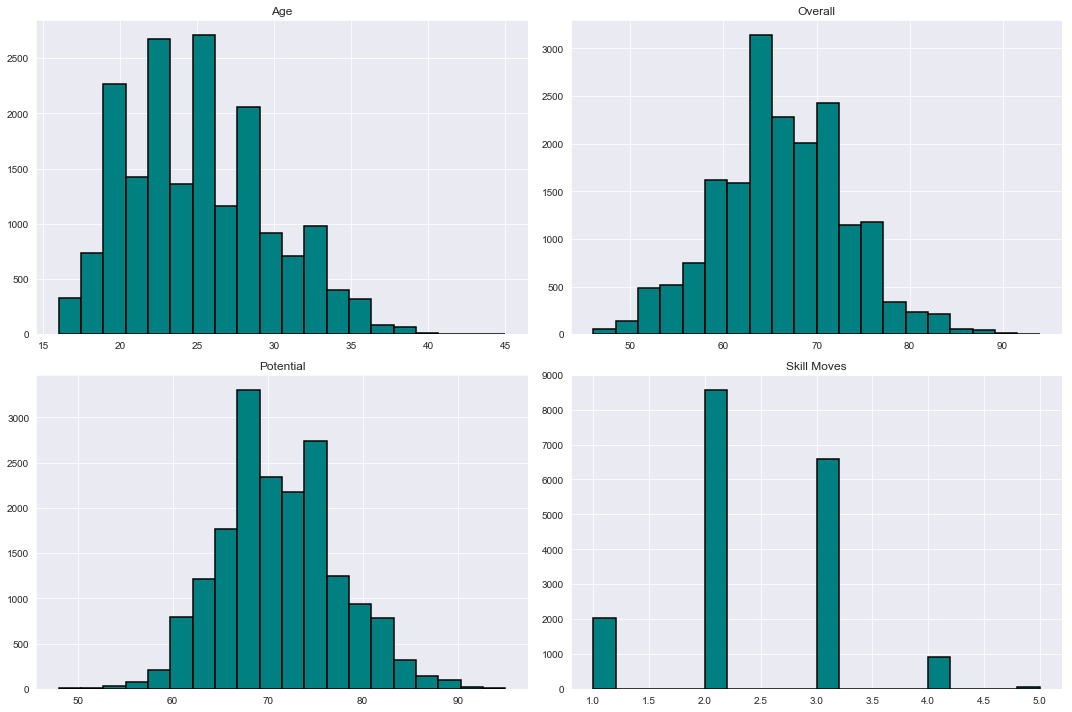

In [765]:
data[['Age','Overall','Potential','Skill Moves']].hist(figsize=(15,10),bins=20,color='teal',linewidth='1.5',edgecolor='k')
plt.tight_layout()
plt.show()

We can say from the above plots that,
- Most players are int the Age group of 20 to 30
- Overall is high from 60 to 80
- Potential is high from 65 to 80
- Most players have only 2 star SkillMove ratings.

### Getting the squad of a Club

- Since my boyhood club is chelsea im going to get the Chelsea FC squad.

In [766]:
# Defining a function to get all the players in a club
def club(x):
    return data[data['Club'] == x][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
                                    'Value','Contract Valid Until']]

club('Chelsea')

,Name,Jersey Number,Position,Overall,Nationality,Age,Wage,Value,Contract Valid Until
5,E. Hazard,10.0,LF,91,Belgium,27,€340K,€93M,2020
14,N. Kanté,13.0,LDM,89,France,27,€225K,€63M,2023
69,Azpilicueta,14.0,RB,86,Spain,28,€175K,€35M,2022
121,Jorginho,8.0,CM,84,Italy,26,€155K,€38M,2023
140,Willian,22.0,RW,84,Brazil,29,€175K,€30.5M,2020
176,M. Kovačić,17.0,LCM,83,Croatia,24,€165K,€35M,"Jun 30, 2019"
177,Kepa,13.0,GK,83,Spain,23,€84K,€28.5M,2025
200,Marcos Alonso,3.0,LB,83,Spain,27,€130K,€24M,2023
209,David Luiz,30.0,LCB,83,Brazil,31,€130K,€17.5M,2019
219,Cesc Fàbregas,4.0,CM,83,Spain,31,€140K,€22M,2019


## Let us see the best players in English League and try to create a 4-3-3 formation with all the best players in it.

In [767]:
# Checking all the positions and number of players in them.
data_Simple_English.groupby('Position')[['Position']].count()

,Position
Position,
CAM,30
CB,78
CDM,24
CF,2
CM,65
GK,67
LB,47
LCB,19
LCM,14


In [768]:
# converting both LCB and RCB into CB. (converting both into a common Center Back)

data_Simple_English['Position'][data_Simple_English['Position']=='LCB']='CB'
data_Simple_English['Position'][data_Simple_English['Position']=='RCB']='CB'

# converting both LDM and RDM into CDM. (converting both into a common Center Defencive Midfielders)

data_Simple_English['Position'][data_Simple_English['Position']=='RDM']='CDM'
data_Simple_English['Position'][data_Simple_English['Position']=='LDM']='CDM'

# converting both LCM and RCM into CM. (converting both into a common Center Midfielders)

data_Simple_English['Position'][data_Simple_English['Position']=='LCM']='CM'
data_Simple_English['Position'][data_Simple_English['Position']=='RCM']='CM'

# converting both LF and RF into LW and RW respectively.

data_Simple_English['Position'][data_Simple_English['Position']=='LF']='LW'
data_Simple_English['Position'][data_Simple_English['Position']=='RF']='RW'

# converting all RS,LS and CF into a ST. (converting all three of them into a common Striker)

data_Simple_English['Position'][data_Simple_English['Position']=='RS']='ST'
data_Simple_English['Position'][data_Simple_English['Position']=='LS']='ST'
data_Simple_English['Position'][data_Simple_English['Position']=='CF']='ST'

C:\Users\Se7eN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Se7eN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Se7eN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\S

In [769]:
# Checking the positions.
data_Simple_English.groupby('Position')[['Position']].count()

,Position
Position,
CAM,30
CB,118
CDM,36
CM,95
GK,67
LB,47
LM,38
LW,13
LWB,7


In [770]:
# Creating some default formations.

squad_442   = ['GK', 'LB', 'CB', 'CB', 'RB', 'CDM', 'CDM', 'LM', 'ST', 'ST', 'RM']
squad_433   = ['GK', 'LB', 'CB', 'CB', 'RB', 'CM', 'CDM', 'CM', 'LW', 'ST', 'RW']
squad_4231  = ['GK', 'LB', 'CB', 'CB', 'RB', 'CDM', 'CDM', 'CAM', 'LM', 'ST', 'RM']
squad_41212 = ['GK', 'LB', 'CB', 'CB', 'RB', 'CM', 'CDM', 'CM', 'CAM', 'ST', 'ST']
squad_424   = ['GK', 'LB', 'CB', 'CB', 'RB', 'CDM', 'CDM', 'LW', 'ST', 'ST', 'RW']

# Creating a dataframe with only formation

data_Simple_English_Formation=data_Simple_English[['Position','Name','Overall','Club']]

# Selecting a formation

print('Formations: ')
print('1) 4-3-3 \n2) 4-4-2 \n3) 4-2-3-1 \n4) 4-1-2-1-2 \n5) 4-2-4\n')
n=int(input('Select a Formation : '))
if(n<=0 or n>=6):
    print('Error...! Please check and select a formation again.')
elif(n==1):
    print('You have Selected the 4-3-3 formation')
    formation=squad_433
elif(n==2):
    print('You have Selected the 4-4-2 formation')
    formation=squad_442
elif(n==3):
    print('You have Selected the 4-2-3-1 formation')
    formation=squad_4231
elif(n==4):
    print('You have Selected the 4-1-2-1-2 formation')
    formation=squad_41212
elif(n==5):
    print('You have Selected the 4-2-4 formation')
    formation=squad_424

# printing the line up according to the selected formation

df=data_Simple_English_Formation
for i in formation:
    display(df.loc[df['Position']==(i)][:1].values.tolist())
    df=df.drop(df.loc[df['Position']==(i)][:1].index.tolist())


Formations: 
1) 4-3-3 
2) 4-4-2 
3) 4-2-3-1 
4) 4-1-2-1-2 
5) 4-2-4

Select a Formation : 1
You have Selected the 4-3-3 formation


[['GK', 'De Gea', 91, 'Manchester United']]

[['LB', 'Marcos Alonso', 83, 'Chelsea']]

[['CB', 'J. Vertonghen', 87, 'Tottenham Hotspur']]

[['CB', 'V. van Dijk', 86, 'Liverpool']]

[['RB', 'Azpilicueta', 86, 'Chelsea']]

[['CM', 'K. De Bruyne', 91, 'Manchester City']]

[['CDM', 'N. Kanté', 89, 'Chelsea']]

[['CM', 'David Silva', 90, 'Manchester City']]

[['LW', 'E. Hazard', 91, 'Chelsea']]

[['ST', 'H. Kane', 89, 'Tottenham Hotspur']]

[['RW', 'Bernardo Silva', 86, 'Manchester City']]

## Best Features according to position,

In [771]:
# Taking all the features of players
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features per position
for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('\nPosition {} : {}, {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))


Position CAM : Balance, Agility, Acceleration, BallControl

Position CB : Jumping, Aggression, HeadingAccuracy, Marking

Position CDM : Aggression, Jumping, Balance, BallControl

Position CF : Agility, Balance, Acceleration, Dribbling

Position CM : Balance, Agility, Acceleration, BallControl

Position GK : GKReflexes, GKDiving, GKPositioning, GKHandling

Position LAM : Agility, Balance, Acceleration, Dribbling

Position LB : Acceleration, Balance, Agility, Jumping

Position LCB : Jumping, Aggression, HeadingAccuracy, Marking

Position LCM : Balance, Agility, BallControl, LongPassing

Position LDM : Aggression, BallControl, LongPassing, Balance

Position LF : Balance, Agility, Acceleration, Dribbling

Position LM : Acceleration, Agility, Balance, Dribbling

Position LS : Acceleration, Agility, Finishing, Jumping

Position LW : Acceleration, Agility, Balance, Dribbling

Position LWB : Acceleration, Agility, Balance, Jumping

Position RAM : Agility, Balance, Acceleration, Dribbling

Pos